In [47]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import datasets, linear_model
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score



df = pd.read_csv("data.csv")
df.head(5)

earn=df.head(100)
earn

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Curtis Millender,Belal Muhammad,Marc Goddard,2019-04-13,"Atlanta, Georgia, USA",Blue,False,Welterweight,3,1.0,...,1.0,0.0,0.0,3.0,Orthodox,187.96,193.04,170.0,30.0,31.0
96,Montel Jackson,Andre Soukhamthath,Jason Herzog,2019-04-13,"Atlanta, Georgia, USA",Red,False,Bantamweight,3,0.0,...,0.0,1.0,0.0,1.0,Southpaw,177.80,190.50,135.0,30.0,26.0
97,Lauren Mueller,Poliana Botelho,George Allen,2019-04-13,"Atlanta, Georgia, USA",Blue,False,Women's Flyweight,3,1.0,...,0.0,0.0,0.0,1.0,Orthodox,165.10,170.18,125.0,30.0,27.0
98,Brandon Davis,Randy Costa,Jason Herzog,2019-04-13,"Atlanta, Georgia, USA",Red,False,Bantamweight,3,0.0,...,0.0,0.0,0.0,1.0,Orthodox,177.80,182.88,135.0,24.0,28.0


In [23]:
# Show number of matches in dataset before removing matches with missing stance information
print('Number of matches prior to filtering: ' + str(len(df)))

# Remove matches with missing stance information
filter1 = df[df['B_Stance'].notnull()]
filter2 = filter1[filter1['R_Stance'].notnull()]
filter3 = filter2[filter2['Referee'].notnull()]
df = filter3
print('Number of matchs after filtering: ' + str(len(filter3)))

Number of matches prior to filtering: 5144
Number of matchs after filtering: 4865


In [24]:
df.columns[df.isnull().any()]

Index(['B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_CLINCH_att',
       'B_avg_CLINCH_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed',
       'B_avg_GROUND_att', 'B_avg_GROUND_landed', 'B_avg_HEAD_att',
       'B_avg_HEAD_landed',
       ...
       'R_avg_opp_SUB_ATT', 'R_avg_opp_TD_att', 'R_avg_opp_TD_landed',
       'R_avg_opp_TD_pct', 'R_avg_opp_TOTAL_STR_att',
       'R_avg_opp_TOTAL_STR_landed', 'R_total_time_fought(seconds)',
       'R_Reach_cms', 'B_age', 'R_age'],
      dtype='object', length=104)

In [25]:
people = df[df['R_age'].isnull()].head(5)
people

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
4171,Per Eklund,Samy Schiavo,Leon Roberts,2008-10-18,"Birmingham, England, United Kingdom",Red,False,Lightweight,3,1.0,...,0.0,0.0,0.0,0.0,Orthodox,177.80,182.88,155.0,32.0,NaN
4376,Jess Liaudin,Anthony Torres,Mario Yamasaki,2007-09-08,"London, England, United Kingdom",Red,False,Welterweight,3,0.0,...,0.0,1.0,0.0,1.0,Orthodox,175.26,182.88,170.0,29.0,NaN
4438,Jess Liaudin,Dennis Siver,Steve Mazzagatti,2007-04-21,"Manchester, England, United Kingdom",Red,False,Welterweight,3,0.0,...,0.0,0.0,0.0,0.0,Orthodox,175.26,182.88,170.0,28.0,NaN
4767,Keith Rockel,Chris Liguori,John McCarthy,2003-11-21,"Uncasville, Connecticut, USA",Red,False,Middleweight,3,0.0,...,0.0,0.0,0.0,0.0,Orthodox,182.88,NaN,185.0,NaN,NaN
4908,Ben Earwood,Chris Lytle,Mario Yamasaki,2000-11-17,"Atlantic City, New Jersey, USA",Red,False,Welterweight,2,0.0,...,0.0,0.0,0.0,0.0,Orthodox,172.72,NaN,170.0,26.0,NaN


In [26]:
df['R_age'].median()

29.0

In [27]:
df = df.fillna(df.median())
df.loc[people.index.tolist()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
4171,Per Eklund,Samy Schiavo,Leon Roberts,2008-10-18,"Birmingham, England, United Kingdom",Red,False,Lightweight,3,1.0,...,0.0,0.0,0.0,0.0,Orthodox,177.80,182.88,155.0,32.0,29.0
4376,Jess Liaudin,Anthony Torres,Mario Yamasaki,2007-09-08,"London, England, United Kingdom",Red,False,Welterweight,3,0.0,...,0.0,1.0,0.0,1.0,Orthodox,175.26,182.88,170.0,29.0,29.0
4438,Jess Liaudin,Dennis Siver,Steve Mazzagatti,2007-04-21,"Manchester, England, United Kingdom",Red,False,Welterweight,3,0.0,...,0.0,0.0,0.0,0.0,Orthodox,175.26,182.88,170.0,28.0,29.0
4767,Keith Rockel,Chris Liguori,John McCarthy,2003-11-21,"Uncasville, Connecticut, USA",Red,False,Middleweight,3,0.0,...,0.0,0.0,0.0,0.0,Orthodox,182.88,185.42,185.0,29.0,29.0
4908,Ben Earwood,Chris Lytle,Mario Yamasaki,2000-11-17,"Atlantic City, New Jersey, USA",Red,False,Welterweight,2,0.0,...,0.0,0.0,0.0,0.0,Orthodox,172.72,185.42,170.0,26.0,29.0


# Visualizations

In [28]:
#dealing with only the B_fighter and successful attacks landed. Much smaller dataset. 
#reasoning: successful attacks tend are more significatn 
#attacks that were attempted showcase "volume" of that fight which vary match by match
#whereas successfully landed shots showcase a fighter's accuracy/overall control of the match

view = df
#dropping duplicates
newView = view.drop_duplicates(subset = "B_fighter", keep = "first")

newView.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [29]:
view = df[["B_fighter", "weight_class", "R_current_lose_streak", "B_current_win_streak", "B_draw", "B_avg_BODY_landed",
           "B_avg_CLINCH_landed", "B_avg_DISTANCE_landed", "B_avg_GROUND_landed", "B_avg_HEAD_landed", "B_avg_KD", 
           "B_avg_LEG_landed", "B_avg_PASS", "B_avg_REV", "B_avg_SIG_STR_landed", "B_avg_SIG_STR_pct", "B_avg_SUB_ATT", 
           "B_avg_TD_landed", "B_avg_TD_pct", "B_avg_TOTAL_STR_landed", "B_longest_win_streak", "B_losses", 
           "B_avg_opp_BODY_landed", "B_avg_opp_CLINCH_landed", "B_avg_opp_DISTANCE_landed", "B_avg_opp_GROUND_landed", 
           "B_avg_opp_HEAD_landed", "B_avg_opp_KD", "B_avg_opp_LEG_landed", "B_avg_opp_PASS", "B_avg_opp_REV", 
           "B_avg_opp_SIG_STR_landed", "B_avg_opp_SIG_STR_pct", "B_avg_opp_TD_landed", "B_avg_opp_TD_pct",
           "B_avg_opp_TOTAL_STR_landed", "B_total_title_bouts", "B_win_by_Decision_Majority", "B_win_by_Decision_Split", 
           "B_win_by_Decision_Unanimous", "B_win_by_KO/TKO", "B_win_by_Submission", "B_win_by_TKO_Doctor_Stoppage", 
           "B_wins"]]



#dropping duplicates
newView = view.drop_duplicates(subset = "B_fighter", keep = "first")

newView.head()

,B_fighter,weight_class,R_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_landed,B_avg_CLINCH_landed,B_avg_DISTANCE_landed,B_avg_GROUND_landed,B_avg_HEAD_landed,...,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_landed,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins
0,Marlon Moraes,Bantamweight,0.0,4.0,0.0,6.000000,0.000000,20.600000,2.000000,11.200000,...,0.100000,19.200000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0
1,Jessica Eye,Women's Flyweight,0.0,3.0,0.0,9.100000,7.300000,42.100000,1.900000,32.000000,...,0.231000,75.400000,0.0,0.0,2.0,1.0,0.0,0.0,1.0,4.0
2,Donald Cerrone,Lightweight,0.0,3.0,0.0,11.322581,4.387097,38.580645,3.806452,23.258065,...,0.063548,49.774194,1.0,0.0,0.0,7.0,10.0,6.0,0.0,23.0
3,Petr Yan,Bantamweight,1.0,4.0,0.0,14.000000,11.000000,48.750000,10.500000,53.750000,...,0.097500,34.250000,0.0,0.0,0.0,2.0,2.0,0.0,0.0,4.0
4,Blagoy Ivanov,Heavyweight,1.0,1.0,0.0,14.500000,2.000000,59.500000,0.000000,45.000000,...,0.000000,90.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [31]:
filtered_df_female_new  = newView.loc[(newView['weight_class'] == "Women's Bantamweight") | (newView['weight_class'] == "Women's Featherweight") | (newView['weight_class'] == "Women's Featherweight") | (newView['weight_class'] == "Women's Flyweight") | (newView['weight_class'] == "Women's Strawweight")]


In [34]:
filtered_df_male_new  = newView.loc[(newView['weight_class'] == "Bantamweight") | (newView['weight_class'] == "Catch Weight") | (newView['weight_class'] == "Featherweight") | (newView['weight_class'] == "Flyweight") | (newView['weight_class'] == "Heavyweight") | (newView['weight_class'] == "Light Heavyweight") | (newView['weight_class'] == "Lightweight") | (newView['weight_class'] == "Middleweight") | (newView['weight_class'] == "Open Weight") | (newView['weight_class'] == "Welterweight") ]

In [35]:
#female 1, male 2
filtered_df_female_new["Gender"]=1
filtered_df_male_new["Gender"]=2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
frames_new=[filtered_df_male_new,filtered_df_female_new]

In [37]:
combine_male_female_df_new=pd.concat(frames_new)

In [38]:
combine_male_female_df_new

,B_fighter,weight_class,R_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_landed,B_avg_CLINCH_landed,B_avg_DISTANCE_landed,B_avg_GROUND_landed,B_avg_HEAD_landed,...,B_avg_opp_TOTAL_STR_landed,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,Gender
0,Marlon Moraes,Bantamweight,0.0,4.0,0.0,6.000000,0.000000,20.600000,2.000000,11.200000,...,19.200000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,2
2,Donald Cerrone,Lightweight,0.0,3.0,0.0,11.322581,4.387097,38.580645,3.806452,23.258065,...,49.774194,1.0,0.0,0.0,7.0,10.0,6.0,0.0,23.0,2
3,Petr Yan,Bantamweight,1.0,4.0,0.0,14.000000,11.000000,48.750000,10.500000,53.750000,...,34.250000,0.0,0.0,0.0,2.0,2.0,0.0,0.0,4.0,2
4,Blagoy Ivanov,Heavyweight,1.0,1.0,0.0,14.500000,2.000000,59.500000,0.000000,45.000000,...,90.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2
6,Pedro Munhoz,Bantamweight,0.0,3.0,0.0,7.416667,3.416667,34.666667,3.416667,24.000000,...,46.500000,0.0,0.0,0.0,2.0,3.0,3.0,0.0,8.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073,Sara McMann,Women's Bantamweight,0.0,1.0,0.0,4.000000,3.666667,9.333333,6.666667,12.666667,...,76.333333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,1
2266,Larissa Pacheco,Women's Bantamweight,0.0,0.0,0.0,4.823529,4.200000,15.000000,4.333333,17.576923,...,43.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2352,Tina Lahdemaki,Women's Strawweight,0.0,0.0,0.0,4.823529,4.200000,15.000000,4.333333,17.576923,...,43.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2798,Sheila Gaff,Women's Bantamweight,0.0,0.0,0.0,6.000000,6.000000,1.000000,0.000000,1.000000,...,72.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [66]:
df.loc[df['Winner'] =="Red", 'Loser'] = "Blue"
df.loc[df['Winner'] =="Blue", 'Loser'] = "Red"
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Loser
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0,Blue
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0,Blue
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0,Blue
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0,Red
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0,Red


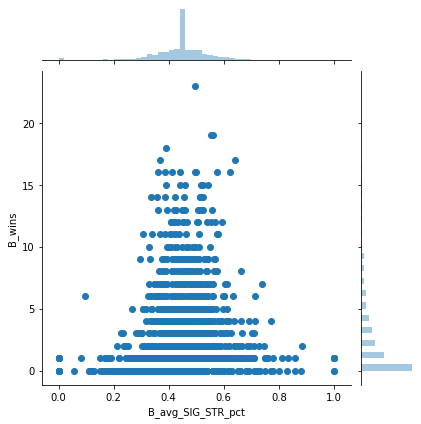

In [239]:
df2 = pd.read_csv("finalView.csv")
e=combine_male_female_df_new.drop(columns=["weight_class"])
#sns.pairplot(data=e.tail(1), hue="Gender");
sns.jointplot(x="B_avg_SIG_STR_pct", y="B_wins", data=df2);

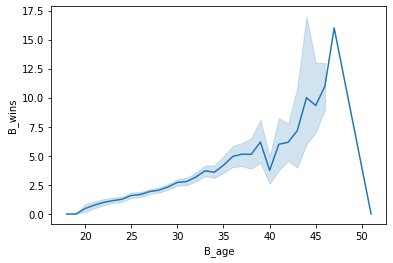

In [161]:
sns.lineplot(x="B_age", y="B_wins", data=df)
#plt.hist(x="B_age", y="B_wins", data=df.head(100))

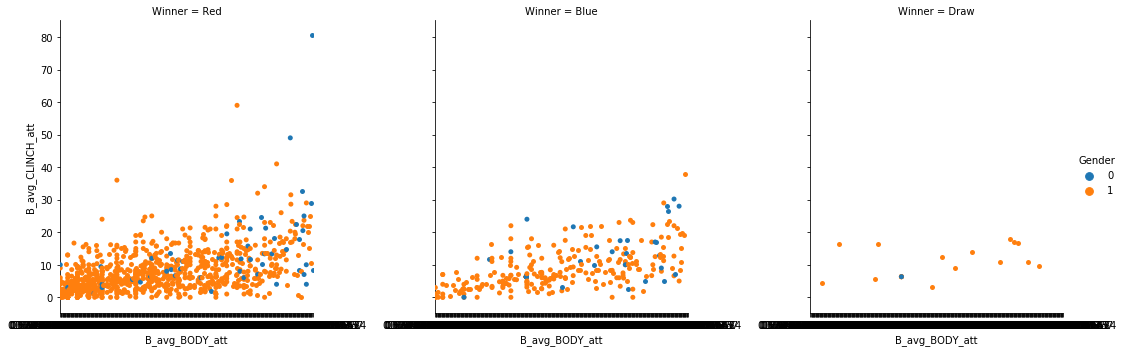

In [230]:
import seaborn as sns

#data3=pd.DataFrame(data9)
#data10.astype(float)


#data4.NHR=pd.to_numeric(data4.NHR)

sns.catplot(x="B_avg_BODY_att", y="B_avg_CLINCH_att", hue="Gender", col="Winner",  data=df2)
#sns.catplot(x="B_avg_BODY_att", y="R_avg_BODY_att", hue="Loser", data=df.head(1))

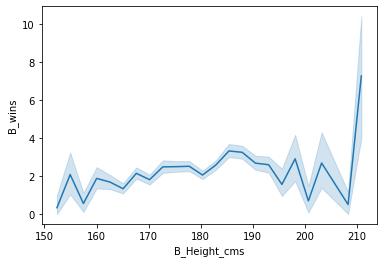

In [164]:
sns.lineplot(x="B_Height_cms", y="B_wins", data=df)


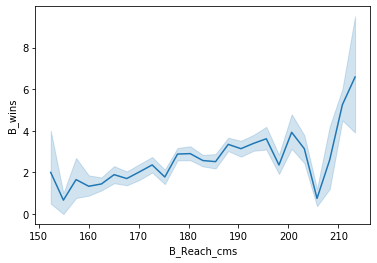

In [165]:
sns.lineplot(x="B_Reach_cms", y="B_wins", data=df)


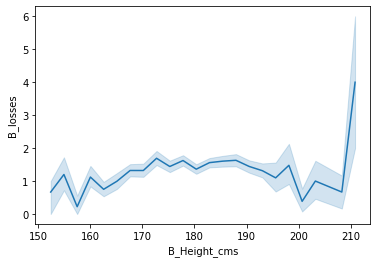

In [166]:
sns.lineplot(x="B_Height_cms", y="B_losses", data=df)


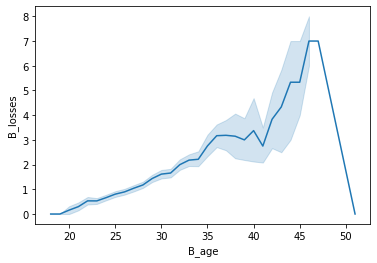

In [167]:
sns.lineplot(x="B_age", y="B_losses", data=df)


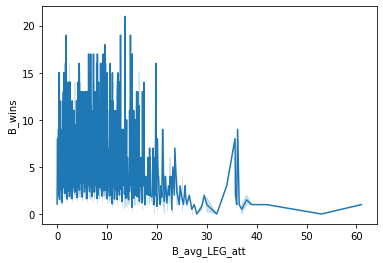

In [197]:
sns.lineplot(x="B_avg_LEG_att", y="B_wins", data=df)


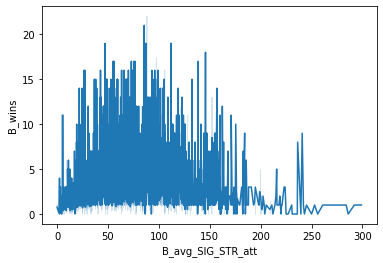

In [200]:
sns.lineplot(x="B_avg_SIG_STR_att", y="B_wins", data=df)


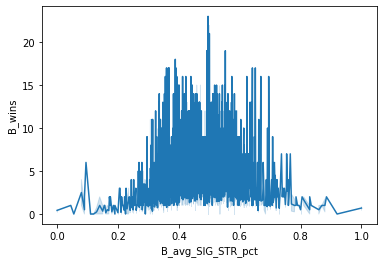

In [204]:
sns.lineplot(x="B_avg_SIG_STR_pct", y="B_wins", data=df)


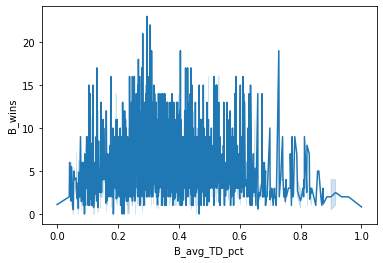

In [208]:
sns.lineplot(x="B_avg_TD_pct", y="B_wins", data=df)


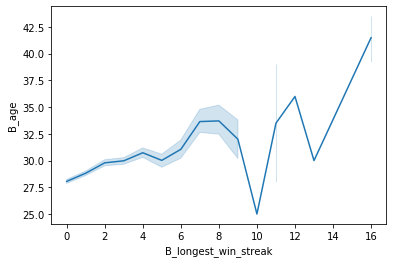

In [212]:
sns.lineplot(x="B_longest_win_streak", y="B_age", data=df)


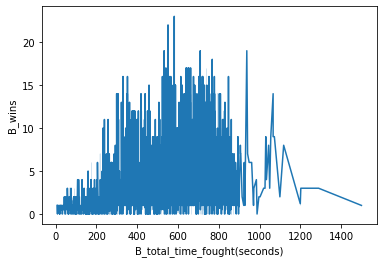

In [220]:
sns.lineplot(x="B_total_time_fought(seconds)", y="B_wins", data=df)


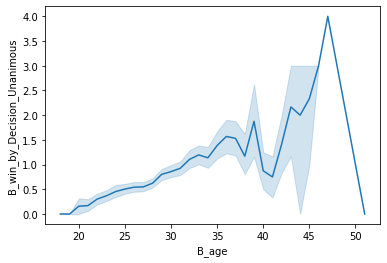

In [226]:
sns.lineplot(x="B_age", y="B_win_by_Decision_Unanimous", data=df)


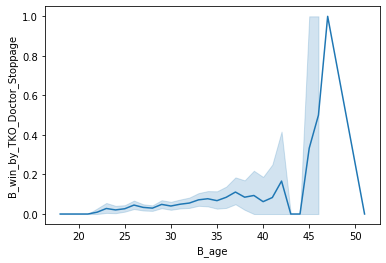

In [228]:
sns.lineplot(x="B_age", y="B_win_by_TKO_Doctor_Stoppage", data=df)


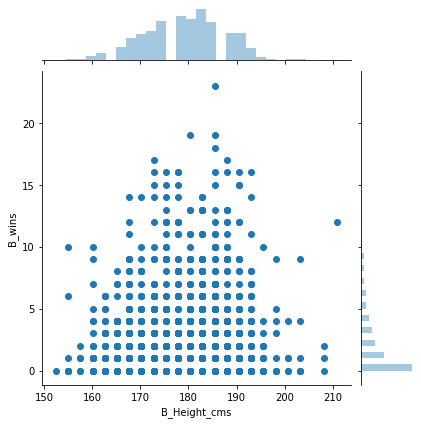

In [237]:
df2 = pd.read_csv("finalView.csv")
e=combine_male_female_df_new.drop(columns=["weight_class"])
#sns.pairplot(data=e.tail(1), hue="Gender");
sns.jointplot(x="B_Height_cms", y="B_wins", data=df2);

#iris = sns.load_dataset("iris")
#sns.jointplot(x="sepal_length", y="petal_length", data=iris);


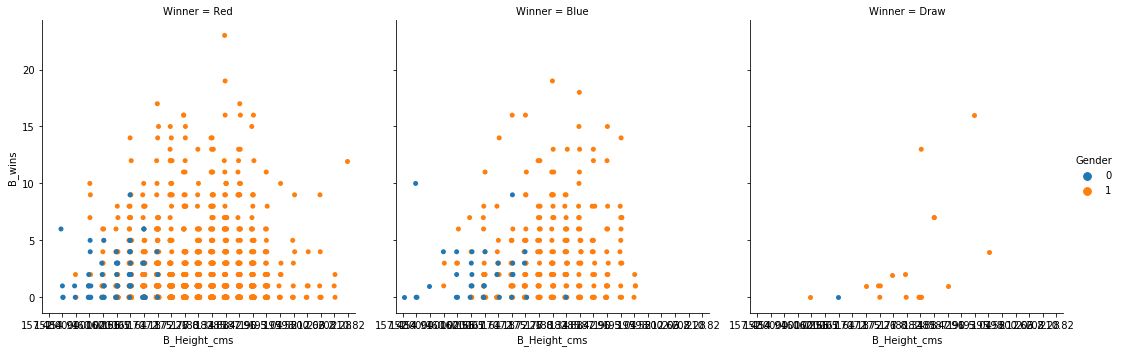

In [233]:
sns.catplot(x="B_Height_cms", y="B_wins", hue="Gender", col="Winner",  data=df2)


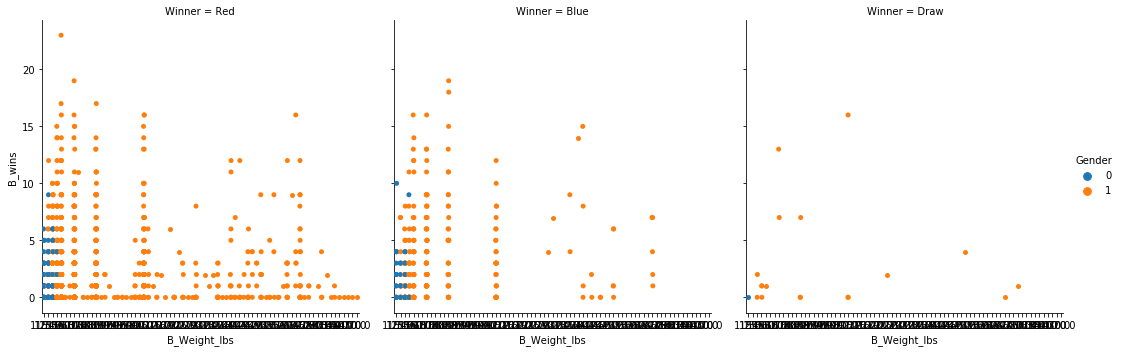

In [235]:
sns.catplot(x="B_Weight_lbs", y="B_wins", hue="Gender", col="Winner",  data=df2)


In [195]:
df2.head()
df2.loc[df2['Winner'] =="Red", 'Loser'] = "Blue"
df2.loc[df2['Winner'] =="Blue", 'Loser'] = "Red"
df2.tail()

,Unnamed: 0,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,...,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Gender,Loser
1657,2073,Miesha Tate,Sara McMann,Marc Goddard,2015-01-31,"Las Vegas, Nevada, USA",Red,False,Women's Bantamweight,3,...,0.0,2.0,Orthodox,167.64,165.10,135.0,34.0,28.0,0,Blue
1658,2266,Jessica Andrade,Larissa Pacheco,Fernando Yamasaki,2014-09-13,"Brasilia, Distrito Federal, Brazil",Red,False,Women's Bantamweight,3,...,0.0,2.0,Orthodox,154.94,157.48,115.0,20.0,22.0,0,Blue
1659,2352,Claudia Gadelha,Tina Lahdemaki,Liam Kerrigan,2014-07-16,"Atlantic City, New Jersey, USA",Red,False,Women's Strawweight,3,...,0.0,0.0,Orthodox,162.56,160.02,115.0,26.0,25.0,0,Blue
1660,2798,Amanda Nunes,Sheila Gaff,Herb Dean,2013-08-03,"Rio de Janeiro, Brazil",Red,False,Women's Bantamweight,3,...,0.0,0.0,Orthodox,172.72,175.26,145.0,23.0,25.0,0,Blue
1661,2830,Alexis Davis,Rosi Sexton,Herb Dean,2013-06-15,"Winnipeg, Manitoba, Canada",Red,False,Women's Bantamweight,3,...,0.0,0.0,Orthodox,167.64,172.72,125.0,35.0,28.0,0,Blue


In [107]:
df2.tail(1468)

,Unnamed: 0,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,...,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Gender,Loser
194,269,Keita Nakamura,Salim Touahri,Jim Perdios,2018-12-01,"Adelaide, South Australia, Australia",Red,False,Welterweight,3,...,0.0,3.0,Southpaw,180.34,185.42,170.0,29.0,34.0,1,Blue
195,270,Elias Garcia,Kai Kara-France,Greg Kleynjans,2018-12-01,"Adelaide, South Australia, Australia",Blue,False,Flyweight,3,...,0.0,0.0,Southpaw,165.10,170.18,125.0,25.0,26.0,1,Red
196,272,Alex Gorgees,Damir Ismagulov,Neil Swailes,2018-12-01,"Adelaide, South Australia, Australia",Blue,False,Lightweight,3,...,0.0,0.0,Switch,187.96,187.96,155.0,27.0,23.0,1,Red
197,276,Pedro Munhoz,Bryan Caraway,Chris Tognoni,2018-11-30,"Las Vegas, Nevada, USA",Red,False,Bantamweight,3,...,0.0,6.0,Orthodox,167.64,165.10,135.0,34.0,32.0,1,Blue
198,277,Darren Stewart,Edmen Shahbazyan,Mark Smith,2018-11-30,"Las Vegas, Nevada, USA",Blue,False,Middleweight,3,...,0.0,2.0,Orthodox,182.88,187.96,185.0,21.0,27.0,1,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,2073,Miesha Tate,Sara McMann,Marc Goddard,2015-01-31,"Las Vegas, Nevada, USA",Red,False,Women's Bantamweight,3,...,0.0,2.0,Orthodox,167.64,165.10,135.0,34.0,28.0,0,Blue
1658,2266,Jessica Andrade,Larissa Pacheco,Fernando Yamasaki,2014-09-13,"Brasilia, Distrito Federal, Brazil",Red,False,Women's Bantamweight,3,...,0.0,2.0,Orthodox,154.94,157.48,115.0,20.0,22.0,0,Blue
1659,2352,Claudia Gadelha,Tina Lahdemaki,Liam Kerrigan,2014-07-16,"Atlantic City, New Jersey, USA",Red,False,Women's Strawweight,3,...,0.0,0.0,Orthodox,162.56,160.02,115.0,26.0,25.0,0,Blue
1660,2798,Amanda Nunes,Sheila Gaff,Herb Dean,2013-08-03,"Rio de Janeiro, Brazil",Red,False,Women's Bantamweight,3,...,0.0,0.0,Orthodox,172.72,175.26,145.0,23.0,25.0,0,Blue


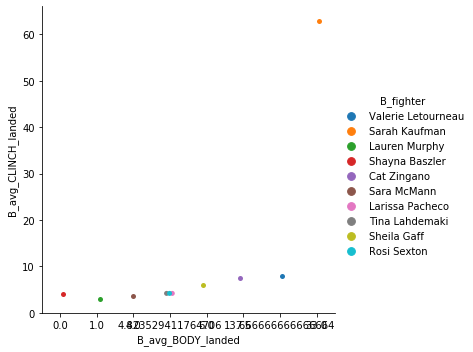

In [138]:
sns.catplot(x="B_avg_BODY_landed", y="B_avg_CLINCH_landed", hue="B_fighter", data=df2.tail(10))


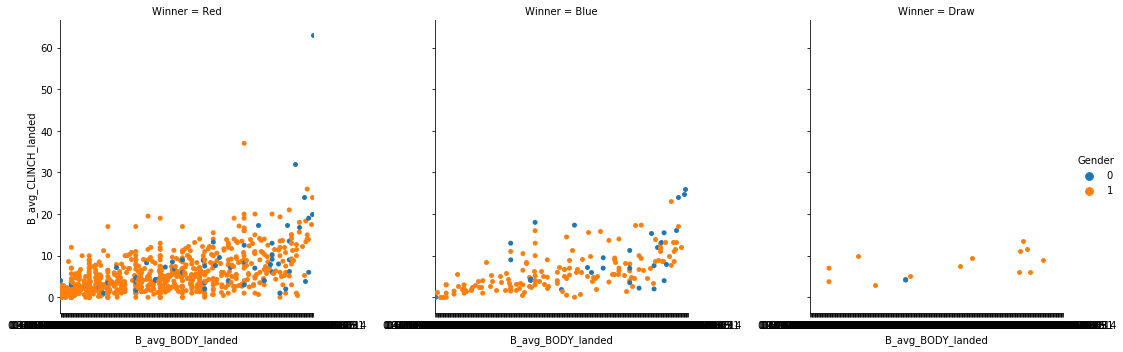

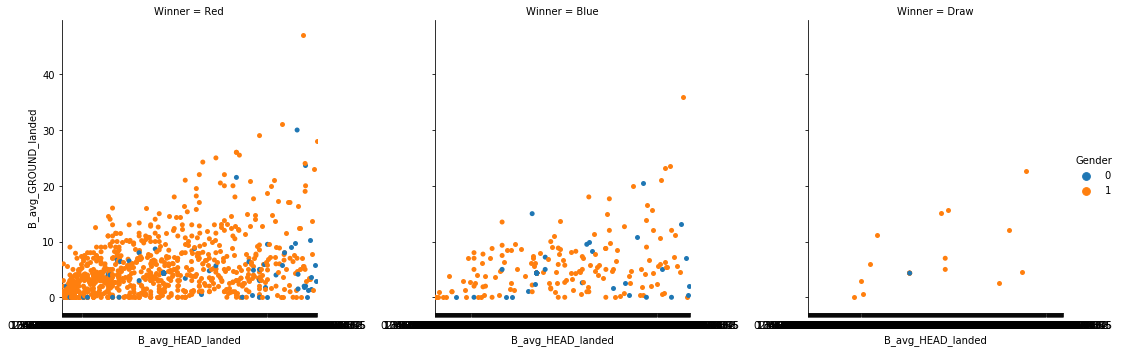

In [121]:
import seaborn as sns

#data3=pd.DataFrame(data9)
#data10.astype(float)
#df2["B_wins"]=pd.to_numeric(df2["B_wins"])
#df2["B_avg_CLINCH_landed"]=pd.to_numeric(df2["B_avg_CLINCH_landed"])


#data4.NHR=pd.to_numeric(data4.NHR)

#sns.catplot(x="B_wins", y="B_avg_CLINCH_landed", hue="Gender", col="Winner", data=df2.tail(1468))
sns.catplot(x="B_avg_BODY_landed", y="B_avg_CLINCH_landed", hue="Gender", col="Winner", data=df2.tail(1468))
sns.catplot(x="B_avg_HEAD_landed", y="B_avg_GROUND_landed", hue="Gender", col="Winner", data=df2.tail(1468))

#sns.catplot(x="B_wins", y="B_avg_BODY_landed", hue="Gender", col="Winner", data=df2.tail(1468))


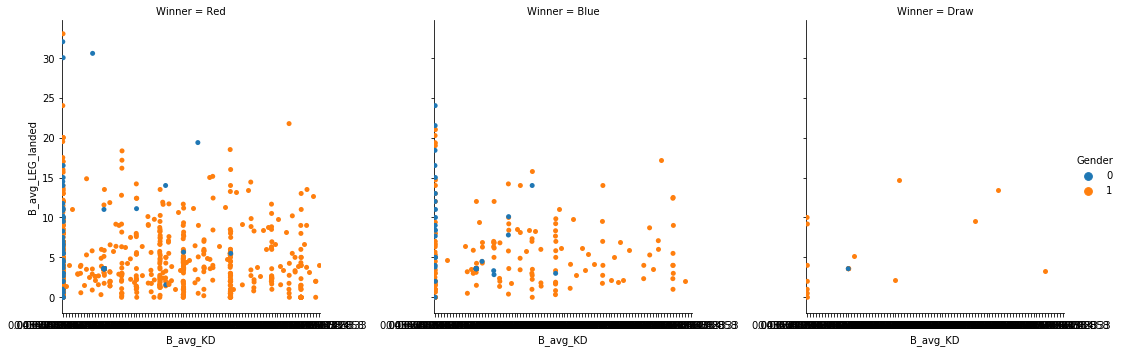

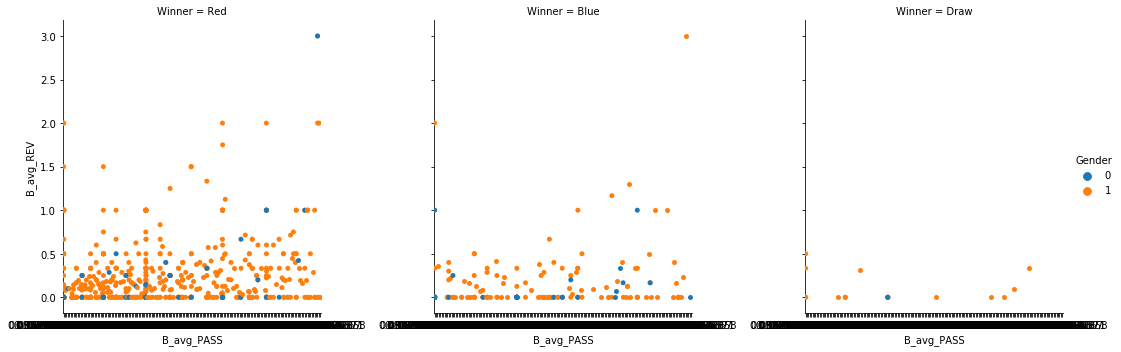

In [122]:
sns.catplot(x="B_avg_KD", y="B_avg_LEG_landed", hue="Gender", col="Winner", data=df2.tail(1468))

sns.catplot(x="B_avg_PASS", y="B_avg_REV", hue="Gender", col="Winner", data=df2.tail(1468))


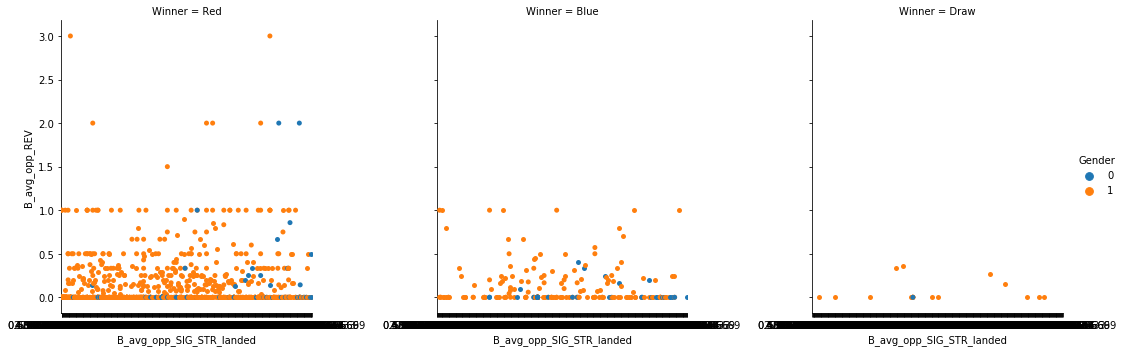

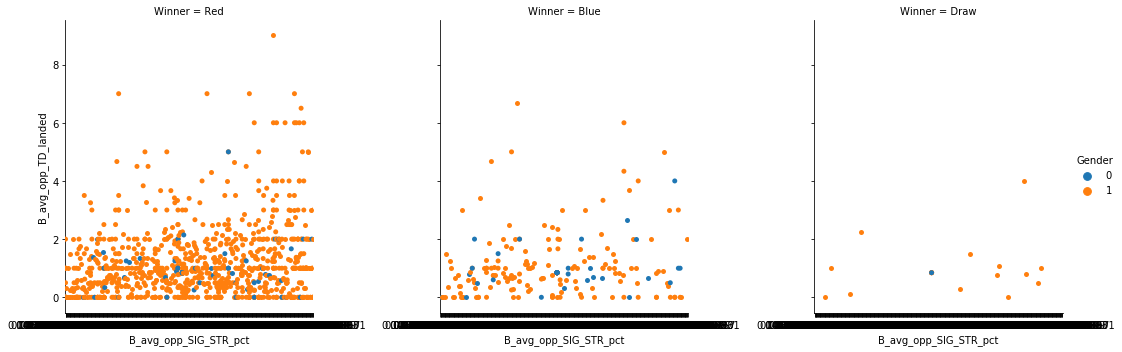

In [123]:
sns.catplot(x="B_avg_opp_SIG_STR_landed", y="B_avg_opp_REV", hue="Gender", col="Winner", data=df2.tail(1468))

sns.catplot(x="B_avg_opp_SIG_STR_pct", y="B_avg_opp_TD_landed", hue="Gender", col="Winner", data=df2.tail(1468))

# Trains the Models 

In [17]:

def split_fighter_datasets(predictor, target):

    #Split arrays or matrices into random train and test subsets
    X = combine_male_female_df_new[predictor]
    y = combine_male_female_df_new[target]
    fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test = train_test_split(X, y, test_size = 0.6, random_state=42)
    return fighter_X_train, fighter_X_test, fighter_y_train, fighter_y_test

In [18]:
#Looking at wins against average body strikes landed 
#In general, looking at wins-- which attribute is most effective towards winning
#I have a theory it's takedowns 


In [19]:
predictor=['B_avg_BODY_landed']
target='B_current_win_streak'
fighter_X_train,fighter_X_test,fighter_y_train,fighter_y_test=split_fighter_datasets(predictor,target)

In [20]:
regr = linear_model.LinearRegression()

In [87]:
predictor=['B_win_by_KO/TKO']
target='B_current_win_streak'
fighter_X_train,fighter_X_test,fighter_y_train,fighter_y_test=split_fighter_datasets(predictor,target)

In [89]:
#we made an algorithm that pairwise was pitted against wins. And then here are the average mean square, 
#coef of determine
#variance score 
#we can use the idea of calculate_and_plot_fighter_linear_regression


In [ ]:
#We can run all these, sure, but we can't submit like 20 linear regression graphs and 20 everything
#We can get the most relavent plots and everything